## Dependencies

Change working directory to location where files were placed that were generated after running notebook 4.

In [1]:
getwd()

[1] "C:/Windows"

In [2]:
setwd('//infoscidiv/users/jkaddis/Desktop/GitHub/ICU_study_nPOD_v3/SASUniversityEdition/myfolders')
getwd()

[1] "\\\\infoscidiv/users/jkaddis/Desktop/GitHub/ICU_study_nPOD_v3/SASUniversityEdition/myfolders"

Diabetologia requires the use of Arial or Helvetica font, therefore need to install extra fonts.  Only loading the arial based fonts, if all fonts were loaded, it would take several minutes.

In [3]:
library(extrafont)
font_import(pattern = 'arial')
loadfonts(device = "win")

Registering fonts with R


Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in C:\Windows\Fonts ...
Extracting .afm files from .ttf files...
C:\Windows\Fonts\arial.ttf : ArialMT already registered in fonts database. Skipping.
C:\Windows\Fonts\arialbd.ttf : Arial-BoldMT already registered in fonts database. Skipping.
C:\Windows\Fonts\arialbi.ttf : Arial-BoldItalicMT already registered in fonts database. Skipping.
C:\Windows\Fonts\ariali.ttf : Arial-ItalicMT already registered in fonts database. Skipping.
Found FontName for 0 fonts.
Scanning afm files in C:/Program Files/R/R-3.3.2/library/extrafontdb/metrics
Arial already registered with windowsFonts().


other packages needed

In [4]:
library(tidyverse)
library(magrittr)
library(ggthemes)
library(plyr)
library(dplyr)
library(readr)
library(cowplot)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:

## Figure 1

In [5]:
my_data <- read_csv("figure1.csv", col_names = TRUE)

Parsed with column specification:
cols(
  pancreas_region = col_character(),
  hospbin = col_integer(),
  LSMEAN = col_double(),
  stain = col_character()
)


Parsed with column specification:
cols(
  pancreas_region = col_character(),
  hospbin = col_integer(),
  LSMEAN = col_double(),
  stain = col_character()
)


[1] "pancreas_region" "hospbin"         "LSMEAN"          "stain"          
[5] "days"

Saving 6.67 x 5.5 in image


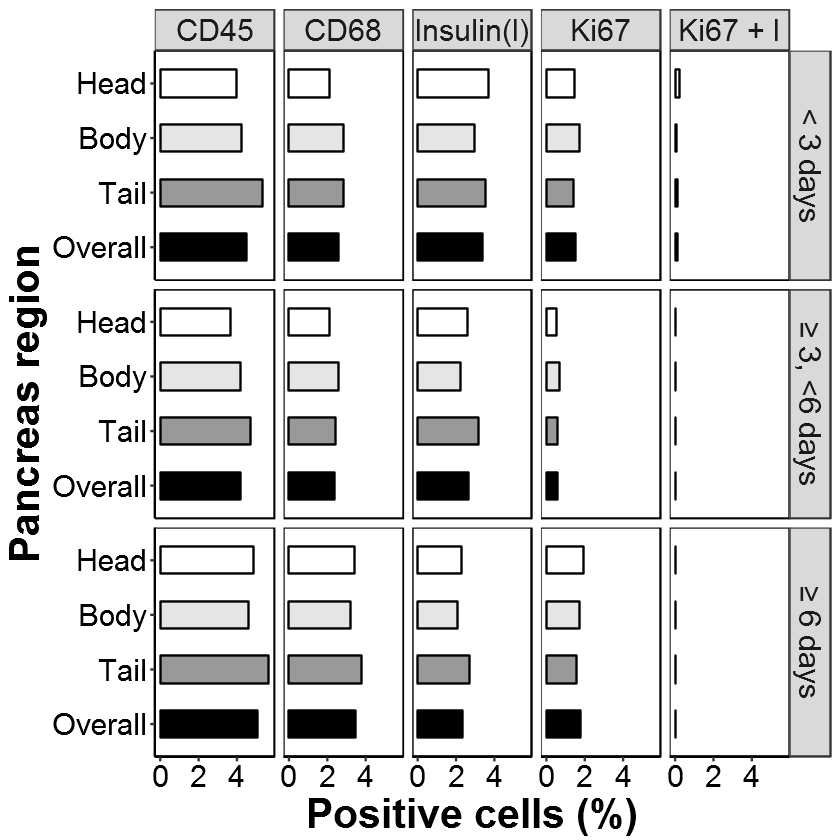

In [6]:
my_data <- read_csv("figure1.csv", col_names = TRUE)

my_data %<>% mutate(days = paste("<", hospbin, "days", sep = " "))
my_data[my_data == "< 6 days"] <- "\u2265 3, <6 days"
my_data[my_data == "< 9 days"] <- "\u2265 6 days"

my_data[my_data == "dual"] <- "Ki67 + I"
my_data[my_data == "Insulin"] <- "Insulin(I)"


# for reordering the columns
my_data <- within(my_data,
                  pancreas_region <- factor(pancreas_region,
                                            levels=rev(c("Head",
                                                     "Body",
                                                     "Tail",
                                                     "Overall"))))

colnames(my_data)
p <- ggplot(my_data, aes(pancreas_region, LSMEAN, color=pancreas_region, fill=pancreas_region)) + scale_color_manual(values =c("black", "black", "black", "black")) + scale_fill_manual(values=c("Head" = "white", "Body" = "grey90", "Tail" = "grey60", "Overall" = "black")) 
#use below version for color
#p <- ggplot(my_data, aes(pancreas_region, LSMEAN, fill=factor(pancreas_region)))+ guides(fill=FALSE)

p_col <- p + geom_col(width = 0.5) +
  coord_flip() +
  theme_bw() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        axis.text = element_text(colour = "black", size = 18, family="Arial"),
        axis.title = element_text(size = 24, vjust=0, face="bold", family="Arial"),
        panel.border = element_rect(color = "black")) +
 theme(legend.position="none", panel.border = element_rect(color = "black")) +
  xlab("Pancreas region") + 
  ylab("Positive cells (%)")

Fig1<-p_col + facet_grid(days ~ stain) + theme(strip.text.x = element_text(size = 17.5, family="Arial"), strip.text.y = element_text(size = 17.5, family="Arial"), panel.border = element_rect(color = "black"))

Fig1

ggsave("Fig1.tiff", dpi = 600, height=5.5)

## ESM Figure 2

Required to use Diabetologia color palette, so selected approved rgb colors at http://bit.ly/2cR5JJa and converted to HEX for use in R

In [7]:
rgb(138,169,214, maxColorValue=255) #blue
rgb(192,65,64, maxColorValue=255) #red
rgb(109,165,103, maxColorValue=255) #green

[1] "#8AA9D6"

[1] "#C04140"

[1] "#6DA567"

Parsed with column specification:
cols(
  Case = col_integer(),
  sample_type2 = col_character(),
  hospbin = col_integer(),
  match_group = col_integer(),
  oppc_ageR = col_double(),
  age_group = col_integer(),
  percent_insulin = col_double()
)


[1] "Case"            "sample_type2"    "hospbin"         "match_group"    
[5] "oppc_ageR"       "age_group"       "percent_insulin" "pancreas_region"
[9] "age_range"

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"`geom_smooth()` using method = 'loess'
Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.cha

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"`geom_smooth()` using method = 'loess'
Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"

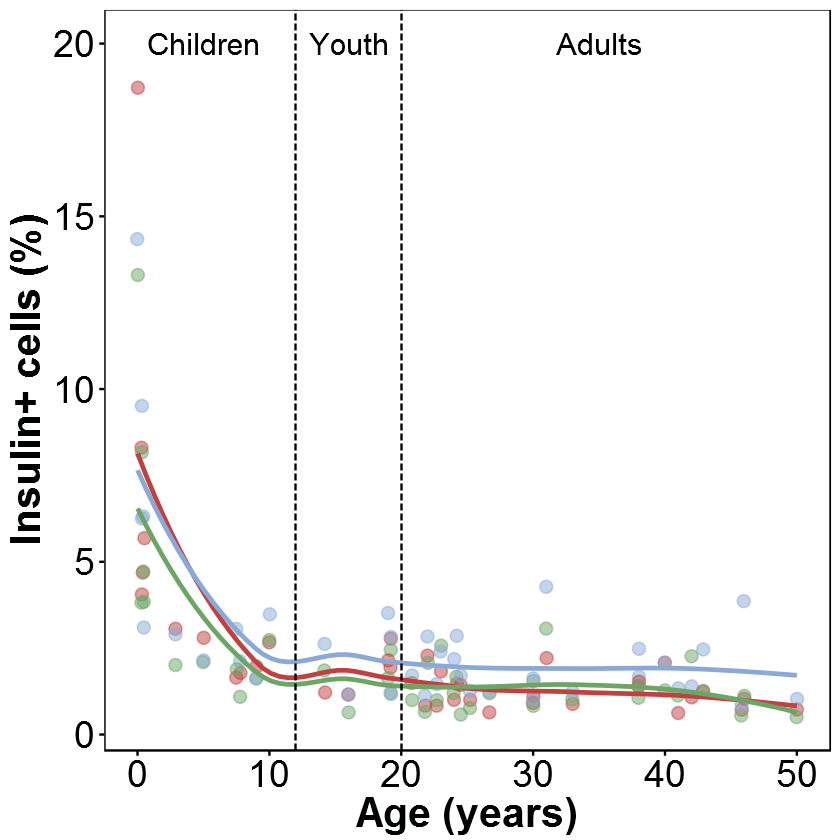

In [8]:
insulin <- read_csv("insulin.csv", col_names = TRUE)

insulin %<>% mutate(pancreas_region = ifelse(sample_type2 == "A", "Head",
                                             ifelse(sample_type2 == "B", "Body",
                                                    "Tail")),
                    age_range = ifelse(age_group == 1, "< 12 years old",
                                       ifelse(age_group == 2, "\u226512 to 20 years old",
                                              "\u226520 years old")))
insulin$Case <- as.character(insulin$Case)

colnames(insulin)

#change order so that head is displayed first
insulin$pancreas_region <- factor(insulin$pancreas_region, levels = insulin$pancreas_region[order(insulin$sample_type2)])



p <- ggplot(insulin, aes(age_range, percent_insulin))
p <- ggplot(insulin, aes(oppc_ageR, percent_insulin))

ESM_fig2<-p  +  geom_jitter(aes(color = pancreas_region), alpha = 0.50, size=3) +
  geom_smooth(aes(group = pancreas_region, color = pancreas_region), se = FALSE) +
  scale_color_manual(values =c("#C04140", "#6DA567", "#8AA9D6")) + #comment this line out if you want to use R's auto-color palette
  scale_fill_manual(values=c("Head" = "#C04140", "Body" = "#6DA567", "Tail" = "#8AA9D6")) +  #comment this line out if you want to use R's auto-color palette
  theme_few() +
  ylab("Insulin+ cells (%)") +
  xlab("Age (years)") +
  labs(color = "Pancreas region") +
  # replace none with the following to add the legend back into the figure: c(.785,.90)  
  theme(legend.position = "none",legend.text=element_text(size=18, face="bold", family="Arial"), legend.title=element_text(size=20, face="bold", family="Arial"),
        axis.text=element_text(size=22, color="black", family="Arial"), axis.title=element_text(size=24, face="bold", family="Arial"), axis.ticks=element_line(color="black"),
        panel.border = element_rect(color = "black")) +
  geom_vline(xintercept = c(12, 20), linetype = "longdash", color = "black", size=0.5) +
  annotate(geom = "text", x = 5, y = 20, label = "Children", color = "black", size=6.5, family="Arial") +
  annotate(geom = "text", x = 16, y = 20, label = "Youth", color = "black", size=6.5, family="Arial") +
  annotate(geom = "text", x = 35, y = 20, label = "Adults", color = "black", size=6.5, family="Arial")

ESM_fig2
#ggsave("ESM_fig2.png", dpi=600)
save_plot("ESM_fig2.tiff", ESM_fig2, dpi=600, base_aspect_ratio=1.5)




## ESM Figure 3

Parsed with column specification:
cols(
  .default = col_double(),
  Case = col_integer(),
  hospbin = col_integer(),
  Sample_Type = col_character(),
  Block__ = col_character(),
  Staff = col_character(),
  Total_Cells = col_integer(),
  tissue_area = col_integer(),
  Q = col_character(),
  match_group = col_integer(),
  age_group = col_integer(),
  sample_type1 = col_character(),
  sample_type2 = col_character()
)
See spec(...) for full column specifications.
Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"

[1] "Case"                            "hospbin"                        
 [3] "Sample_Type"                     "Block__"                        
 [5] "Staff"                           "classified_area"                
 [7] "__acinar__endocrine_Area"        "__other_Area"                   
 [9] "Total_Cells"                     "percent_insulin"                
[11] "percent_ki67"                    "percent_dual"                   
[13] "percent_negative"                "tissue_area"                    
[15] "Ki67_Case_Average"               "Ki67_Dual_Positive_Case_Average"
[17] "Q"                               "match_group"                    
[19] "oppc_ageR"                       "age_group"                      
[21] "sample_type1"                    "sample_type2"                   
[23] "pancreas_region"                 "age_range"

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"

age_range,pancreas_region,val
< 12,Head,2.8498582
< 12,Body,2.9254091
< 12,Tail,2.2903627
"=12, <20",Head,0.3816100
"=12, <20",Body,0.5164440
"=12, <20",Tail,0.5022180
=20,Head,0.6654022
=20,Body,0.6631857
=20,Tail,0.7870491


Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"d

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"duplicated levels in factors are deprecated"Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
"d

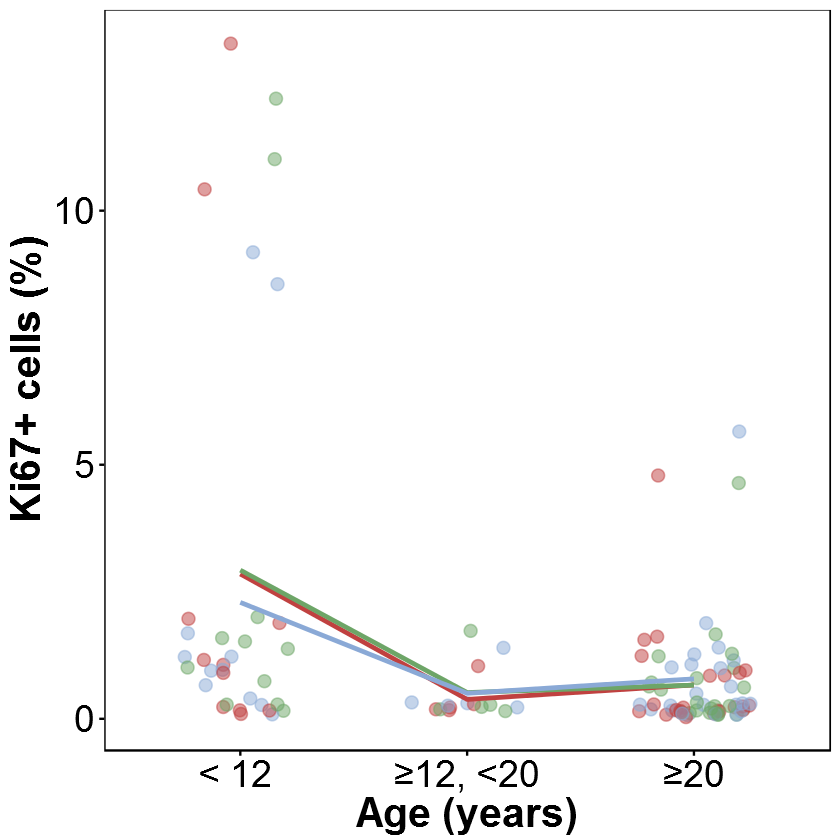

In [14]:
ki67 <- read_csv("ki67.csv", col_names = TRUE)

ki67 %<>% mutate(pancreas_region = ifelse(sample_type2 == "A", "Head",
                                             ifelse(sample_type2 == "B", "Body",
                                                    "Tail")),
                    age_range = ifelse(age_group == 1, "< 12 ",
                                       ifelse(age_group == 2, "\u226512, <20",
                                              "\u226520")))
ki67$Case <- as.character(ki67$Case)



#change order so that region is displayed in proper order
ki67$pancreas_region <- factor(ki67$pancreas_region, levels = ki67$pancreas_region[order(ki67$sample_type2)])

#change order so that age is displayed in proper order
ki67$age_range <- factor(ki67$age_range, levels = ki67$age_range[order(ki67$age_group)])

colnames(ki67)

#need to calculate means at each level of each group, to plot simple effects 
meanki67 <- ddply(ki67,.(age_range,pancreas_region),summarise, val = mean(percent_ki67))
meanki67

p <- ggplot(ki67, aes(age_range, percent_ki67))


ESM_Fig3<-p + geom_jitter(aes(color = pancreas_region), alpha=0.50, size=3, width = 0.25) +
  geom_line(data=meanki67, aes(y=val, group=pancreas_region, color = pancreas_region), size=1)+
  scale_color_manual(values =c("#C04140", "#6DA567", "#8AA9D6")) + #comment this line out if you want to use R's auto-color palette
  scale_fill_manual(values=c("Head" = "#C04140", "Body" = "#6DA567", "Tail" = "#8AA9D6")) +  #comment this line out if you want to use R's auto-color palette
  theme_few() +
  ylab("Ki67+ cells (%)") +
  xlab("Age (years)") +
  labs(color = "Pancreas region") +
  # replace none with the following to add the legend back into the figure: c(.785,.90)    
  theme(legend.position = "none",legend.text=element_text(size=18, face="bold", family="Arial"), legend.title=element_text(size=20, face="bold", family="Arial"),
        axis.text=element_text(size=22, color="black", family="Arial"), axis.title=element_text(size=24, face="bold", family="Arial", color="black"), axis.ticks=element_line(color="black"),
        panel.border = element_rect(color = "black")) 

ESM_Fig3
#ggsave("ESM_Fig3.png", dpi = 600)
save_plot("ESM_Fig3.tiff", ESM_Fig3, dpi=600, base_aspect_ratio=1.5)

### Data visualization not included in manuscript

Exploratory look at insulin vs. cd45, as requested by reviewer, but image or analysis not presented in paper.  Since none of these CD45+ cells were observed to be in direct proximity to insulin positive cells, this comparison is difficult to interpret without additional data to determine if these CD45+ cells are resident or trafficking cells.  

Parsed with column specification:
cols(
  Case = col_integer(),
  Positive_cells_percentage = col_double(),
  Region = col_character(),
  Stain = col_character()
)
Warning message:
"Unknown column 'Region_n'"Warning message:
"Unknown column 'Stain_adj'"

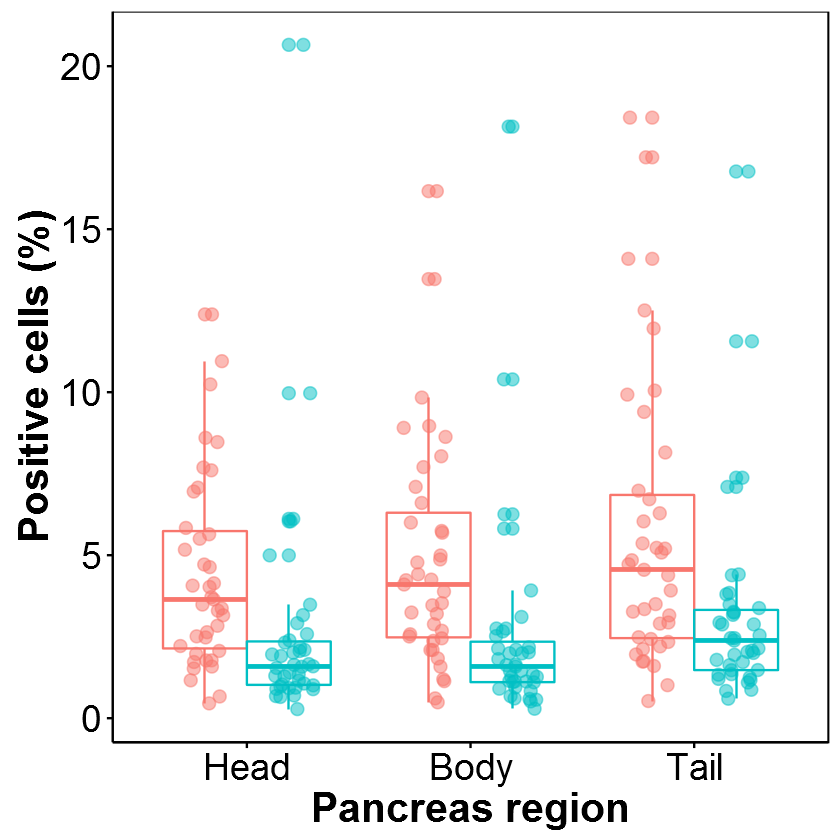

In [164]:
boxplot <- read_csv("cd45_insulin.csv", col_names = TRUE)

boxplot %<>% mutate(pancreas_region = ifelse(Region == "A", "Head",
                                             ifelse(Region == "B", "Body",
                                                    "Tail")))
# for reordering the columns
boxplot <- within(boxplot,pancreas_region <- factor(pancreas_region,
                                            levels=rev(c("Tail",
                                                     "Body",
                                                     "Head"))))

#Instead of plotting all the points directly over A, B, or C (all together as one blob); this code offsets it so that they are plotted directly over their respective boxplots
boxplot$Region_n[boxplot$Region == "A"]<-1
boxplot$Region_n[boxplot$Region == "B"]<-2
boxplot$Region_n[boxplot$Region == "C"]<-3

boxplot$Stain_adj[boxplot$Stain == "CD45"]<- -0.20
boxplot$Stain_adj[boxplot$Stain == "Insulin"]<- 0.20


#boxplots defaults used, i.e. box represents IQR, whiskers 1.5*IQR, beyond whiskers are outliers, and line within box is the median.  
p3<-ggplot(boxplot, aes(pancreas_region,Positive_cells_percentage,fill=Stain)) +
geom_boxplot(outlier.size=3, fill=NA, alpha=0.5, show.legend=FALSE, aes(fill=Stain, color=Stain)) +
    geom_jitter(aes(Region_n + Stain_adj,Positive_cells_percentage, color=Stain),
        position=position_jitter(width=0.1,height=0),
        alpha=0.5,
        size=3,
        show.legend=FALSE)+
    xlab("Pancreas region") +
    ylab("Positive cells (%)") +
    theme(axis.title = element_text(size=24,color='black', family="Arial", face="bold"),
          axis.text = element_text(size=22,color='black', family="Arial"), 
          axis.ticks=element_line(color="black"))+
     panel_border(colour = "black", size = 0.5, linetype = 1, remove = FALSE)

p3

